<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/Big%20Mart%20Sales%20Prediction/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor

Data Collection and Preprocessing

In [ ]:
mart_train_data = pd.read_csv("./Train.csv")
mart_test_data = pd.read_csv("./Test.csv")

In [ ]:
print(mart_train_data.shape)
print(mart_test_data.shape)

(8523, 12)
(5681, 11)


In [ ]:
print(mart_train_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
print(mart_test_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [ ]:
print(mart_train_data.info())
print(mart_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [ ]:
print(mart_train_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
print(mart_test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


Handling Missing data

Mode? Mean?

Replace missing value in Item_Weight column by mean

In [ ]:
# mean value of "Item_Weight" column
print(mart_train_data.Item_Weight.mean())
print(mart_test_data.Item_Weight.mean())

12.857645184135976
12.695633368756642


In [ ]:
mart_train_data.Item_Weight.fillna(mart_train_data.Item_Weight.mean(), inplace=True)
mart_test_data.Item_Weight.fillna(mart_test_data.Item_Weight.mean(), inplace=True)

Replace missing value in Outlet_Size column by mode

In [ ]:
mode_of_outlet_size_train = mart_train_data.pivot_table(values="Outlet_Size", columns = "Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size_test = mart_test_data.pivot_table(values="Outlet_Size", columns = "Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_outlet_size_train) 
# Outlet_Size & Outlet_Type are correlated, For grocery store, the mode of the size is small and so on

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
print(mode_of_outlet_size_test)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values_train = mart_train_data.Outlet_Size.isnull()
missing_values_test = mart_test_data.Outlet_Size.isnull()

In [ ]:
mart_train_data.loc[missing_values_train,'Outlet_Size'] = mart_train_data.loc[missing_values_train,'Outlet_Type'].apply(lambda x: mode_of_outlet_size_train[x])
mart_test_data.loc[missing_values_test,'Outlet_Size'] = mart_test_data.loc[missing_values_test,'Outlet_Type'].apply(lambda x: mode_of_outlet_size_test[x])

In [ ]:
print(mart_train_data.isnull().sum())
print(mart_test_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Data Analysis

In [ ]:
mart_train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
mart_test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical Features

In [ ]:
sns.set()

<Figure size 432x432 with 0 Axes>

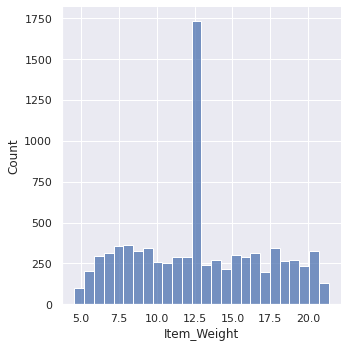

In [ ]:
# Item_weight distribution
plt.figure(figsize=(6,6))
sns.displot(mart_train_data['Item_Weight'])

<Figure size 432x432 with 0 Axes>

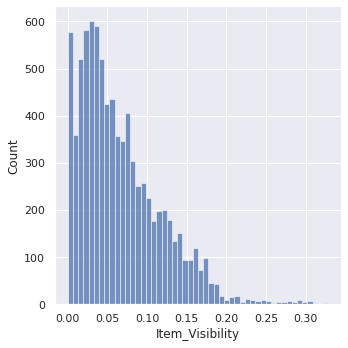

In [ ]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(mart_train_data['Item_Visibility'])

<Figure size 432x432 with 0 Axes>

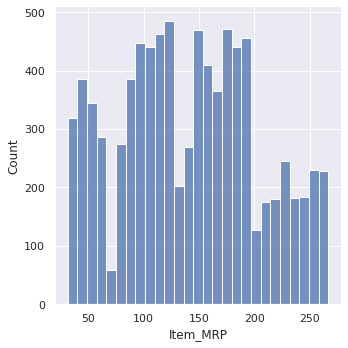

In [ ]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(mart_train_data['Item_MRP'])

<Figure size 432x432 with 0 Axes>

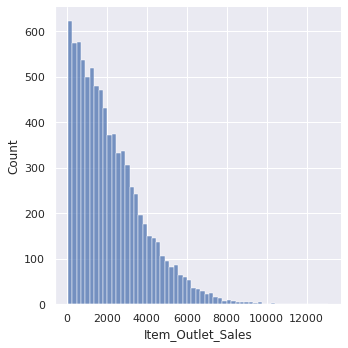

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(mart_train_data['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

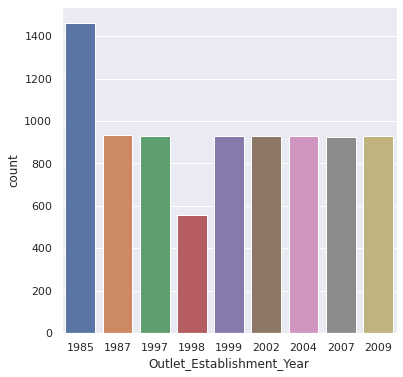

In [ ]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=mart_train_data)

Categorical Feature

Categorical Feature: <br>
1. Item_Fat_Content
2. Item_Type 
3. Outlet_Identifier
4. Outlet_Size
5. Outlet_Location_Type
6. Outlet_Type

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

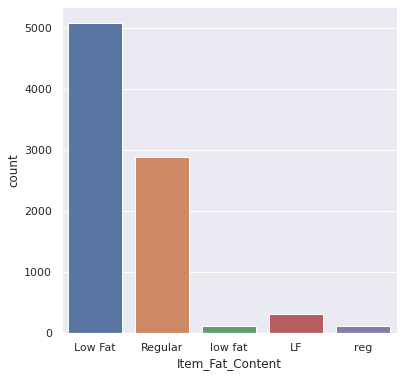

In [ ]:
# Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=mart_train_data)

<Axes: xlabel='Item_Type', ylabel='count'>

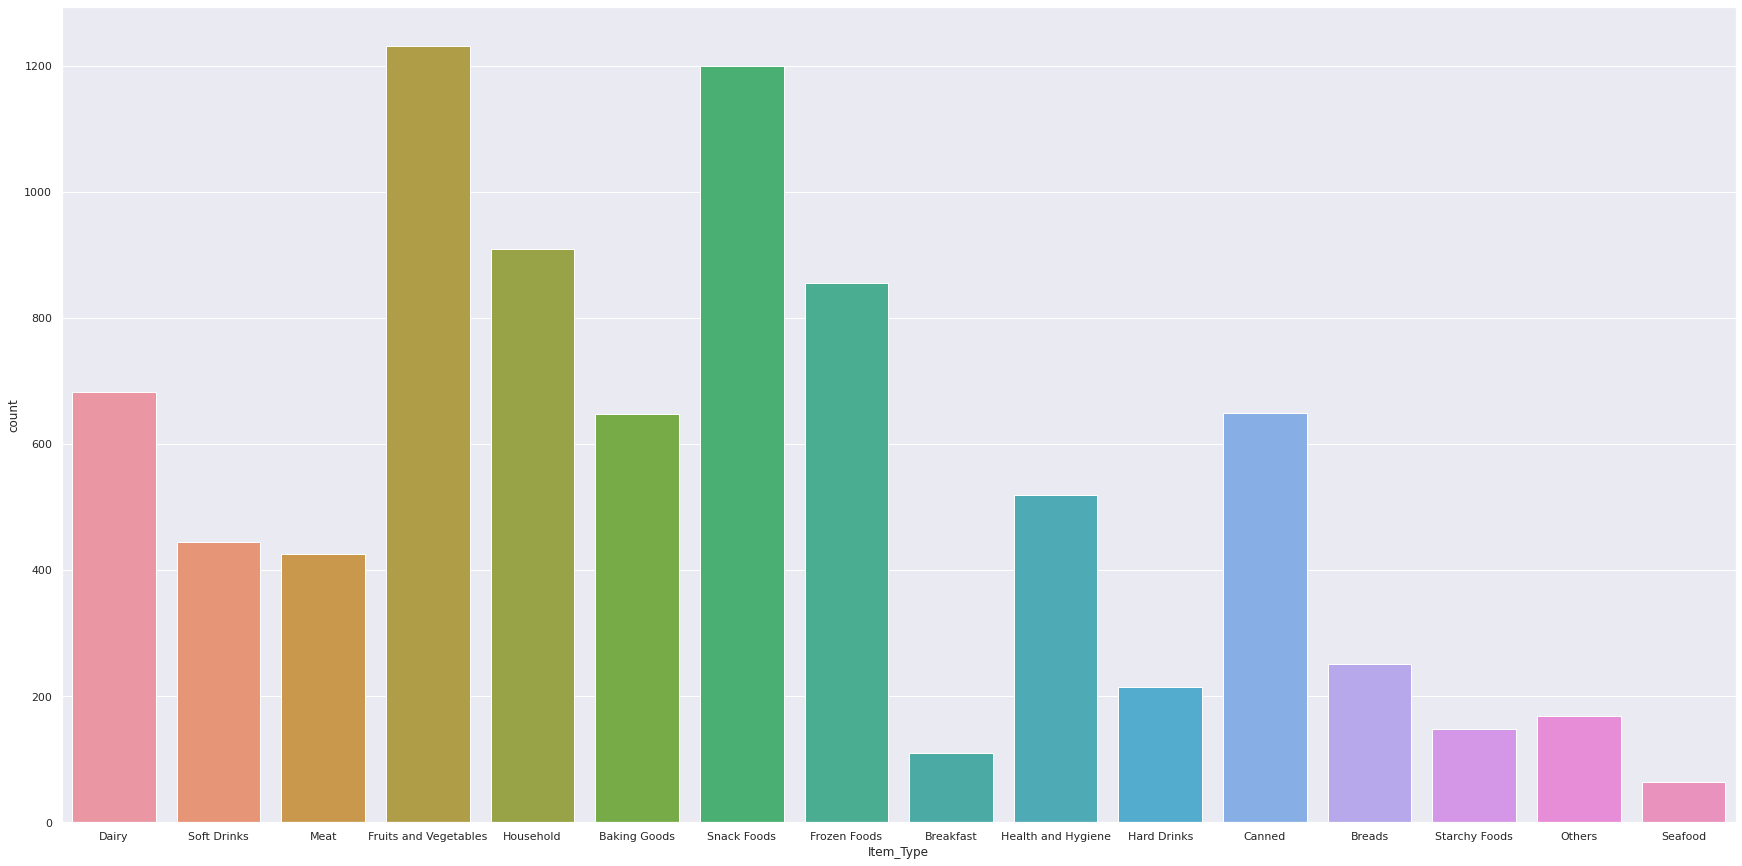

In [ ]:
# Item_Type distribution
plt.figure(figsize=(30,15))
sns.countplot(x='Item_Type', data=mart_train_data)

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

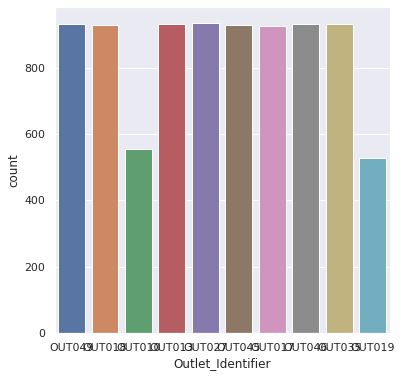

In [ ]:
# Outlet_Identifier distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Identifier', data=mart_train_data)

<Axes: xlabel='Outlet_Size', ylabel='count'>

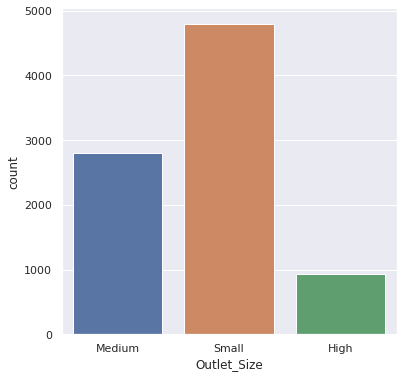

In [ ]:
# Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=mart_train_data)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

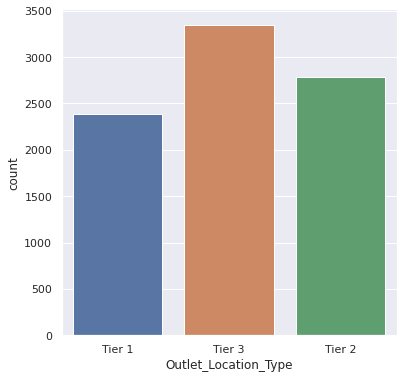

In [ ]:
# Outlet_Location_Type distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=mart_train_data)

<Axes: xlabel='Outlet_Type', ylabel='count'>

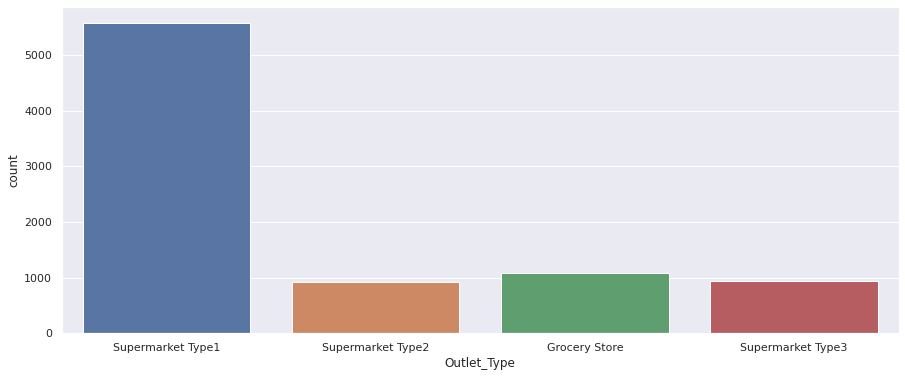

In [ ]:
# Outlet_Type distribution
plt.figure(figsize=(15,6))
sns.countplot(x='Outlet_Type', data=mart_train_data)

Process Data

In [ ]:
mart_train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
mart_train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
mart_train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
mart_test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
mart_test_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
mart_test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
mart_train_data['Item_Identifier'] = encoder.fit_transform(mart_train_data['Item_Identifier'])

mart_train_data['Item_Fat_Content'] = encoder.fit_transform(mart_train_data['Item_Fat_Content'])

mart_train_data['Item_Type'] = encoder.fit_transform(mart_train_data['Item_Type'])

mart_train_data['Outlet_Identifier'] = encoder.fit_transform(mart_train_data['Outlet_Identifier'])

mart_train_data['Outlet_Size'] = encoder.fit_transform(mart_train_data['Outlet_Size'])

mart_train_data['Outlet_Location_Type'] = encoder.fit_transform(mart_train_data['Outlet_Location_Type'])

mart_train_data['Outlet_Type'] = encoder.fit_transform(mart_train_data['Outlet_Type'])

In [104]:
mart_test_data['Item_Identifier'] = encoder.fit_transform(mart_test_data['Item_Identifier'])

mart_test_data['Item_Fat_Content'] = encoder.fit_transform(mart_test_data['Item_Fat_Content'])

mart_test_data['Item_Type'] = encoder.fit_transform(mart_test_data['Item_Type'])

mart_test_data['Outlet_Identifier'] = encoder.fit_transform(mart_test_data['Outlet_Identifier'])

mart_test_data['Outlet_Size'] = encoder.fit_transform(mart_test_data['Outlet_Size'])

mart_test_data['Outlet_Location_Type'] = encoder.fit_transform(mart_test_data['Outlet_Location_Type'])

mart_test_data['Outlet_Type'] = encoder.fit_transform(mart_test_data['Outlet_Type'])

Split data

In [107]:
X = mart_train_data.drop('Item_Outlet_Sales',axis=1)
Y = mart_train_data['Item_Outlet_Sales']

Train Test Split

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [166]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Train Model

In [201]:
regressor = XGBRegressor()

In [202]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Model Evaluation

In [203]:
X_train_prediction = regressor.predict(X_train)

In [204]:
# r2 score
train_error_score = metrics.r2_score(Y_train, X_train_prediction)

In [205]:
print(train_error_score)

0.8639680373364909


In [206]:
X_test_prediction = regressor.predict(X_test)

In [207]:
# r2 score
test_error_score = metrics.r2_score(Y_test, X_test_prediction)

In [208]:
print(test_error_score)

0.5233136709735687


Make Predictive System

In [209]:
prediction = regressor.predict(mart_test_data)

In [212]:
pd.DataFrame(prediction)

,0
0,1111.384155
1,1410.636108
2,1389.432739
3,2645.836914
4,6877.062988
...,...
5676,2034.881104
5677,2554.806641
5678,1900.055298
5679,4222.134766
